# Mini projeto 05

Area de imports

In [6]:
import pandas as pd
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [8]:
# URL do conjunto de dados do câncer de mama
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Carregar os dados diretamente do URL
data = pd.read_csv(urlopen(url), header=None)

In [9]:
# Separe os atributos (features) dos rótulos (labels)
X = data.iloc[:, 2:].values  # Atributos
y = data.iloc[:, 1].values   # Rótulos

# Normalize os dados
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


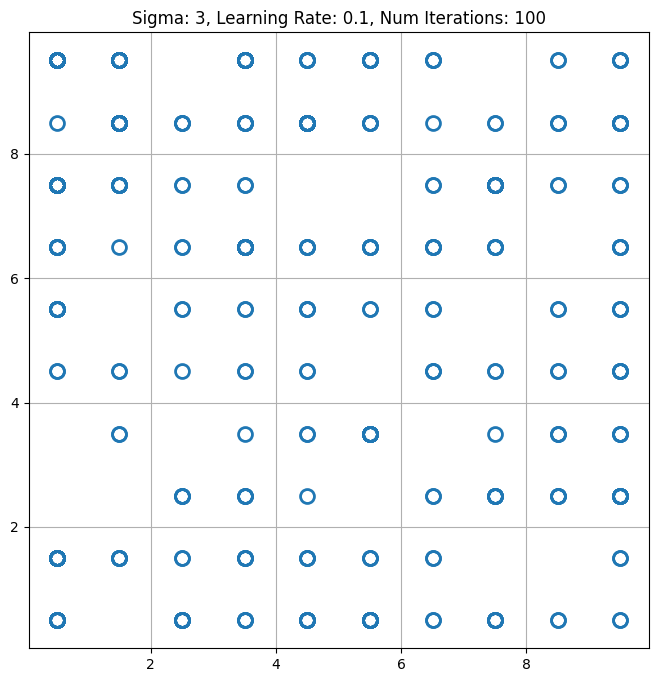

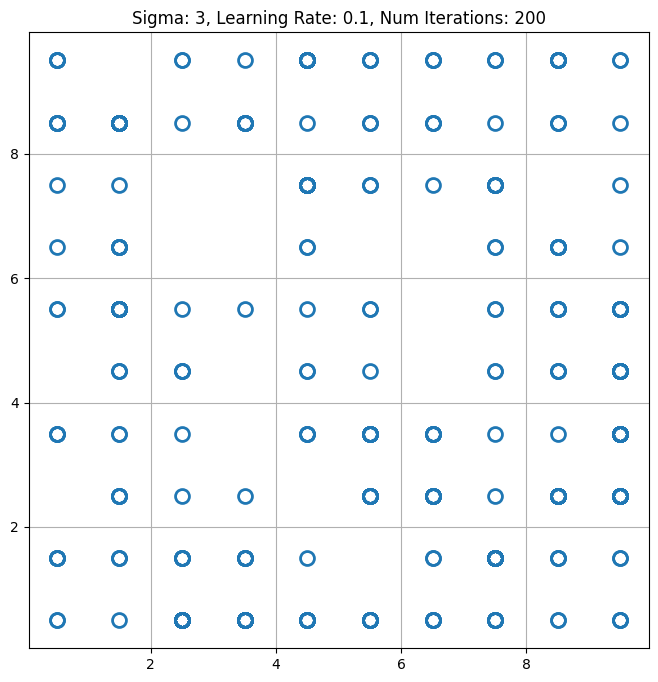

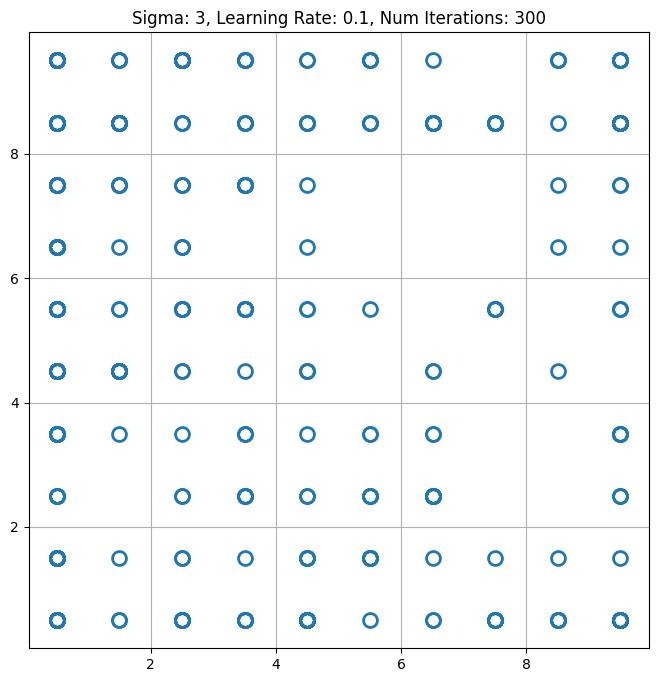

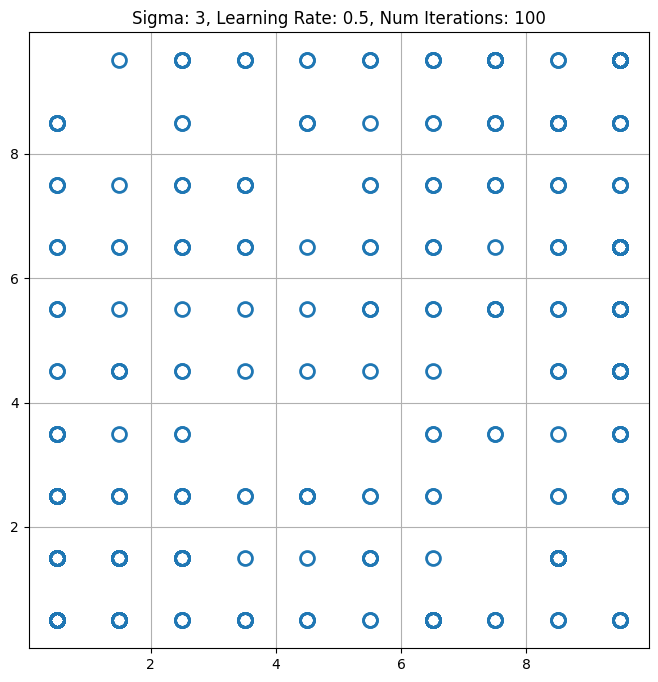

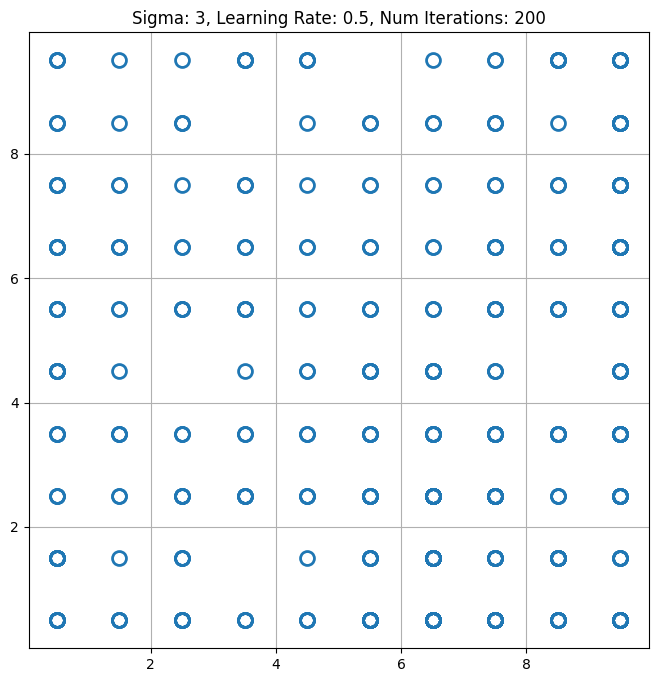

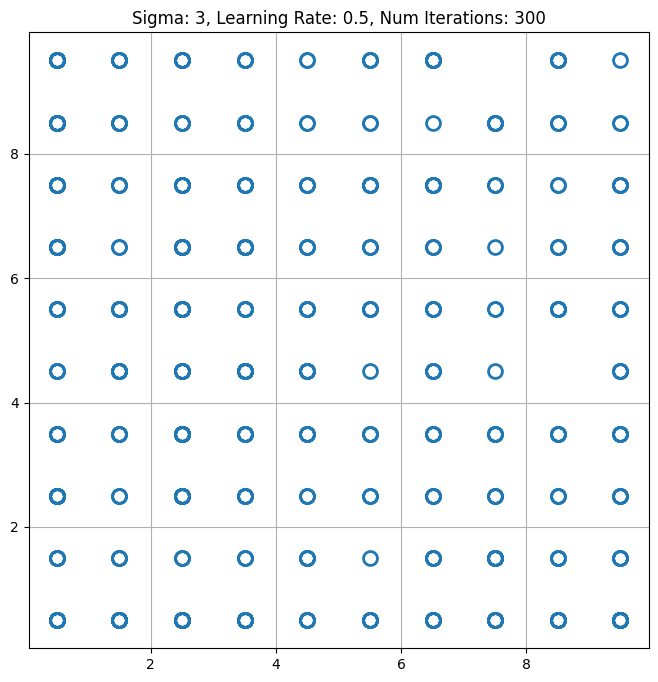

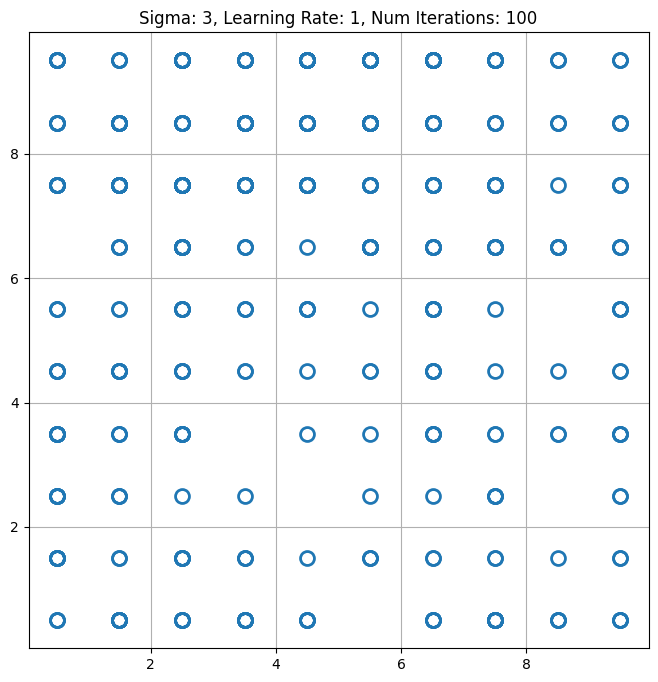

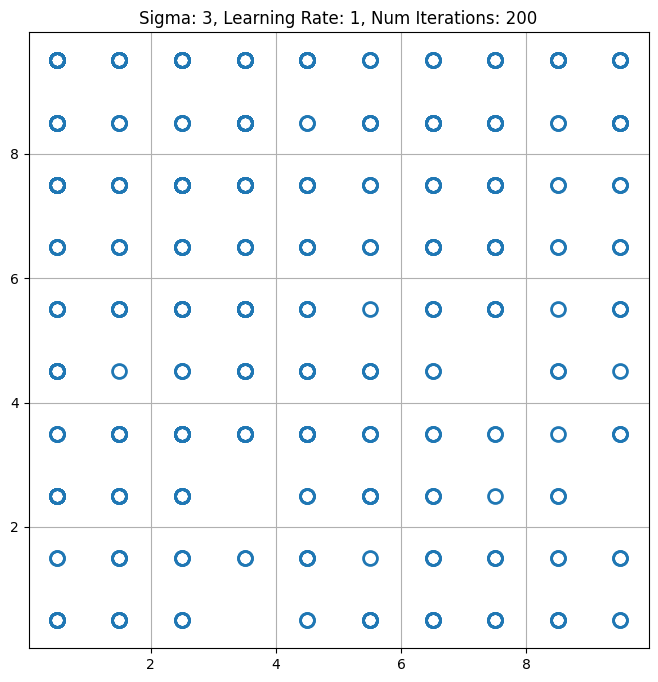

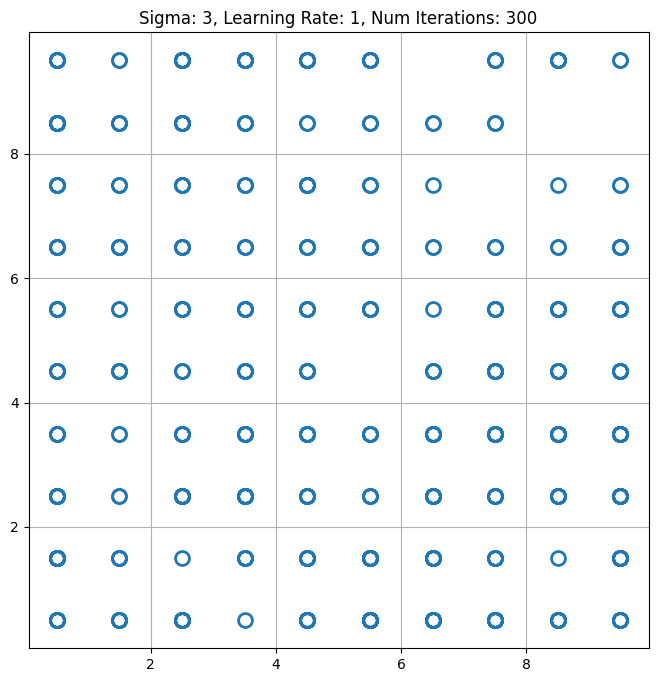

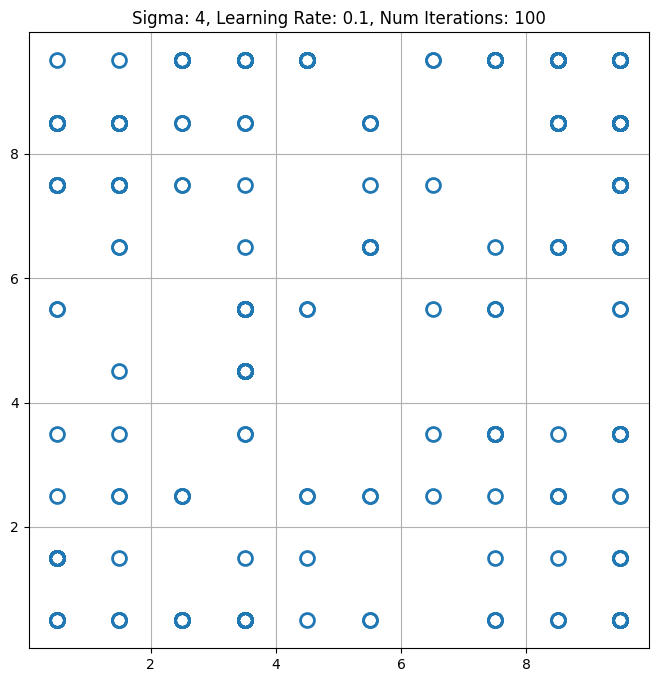

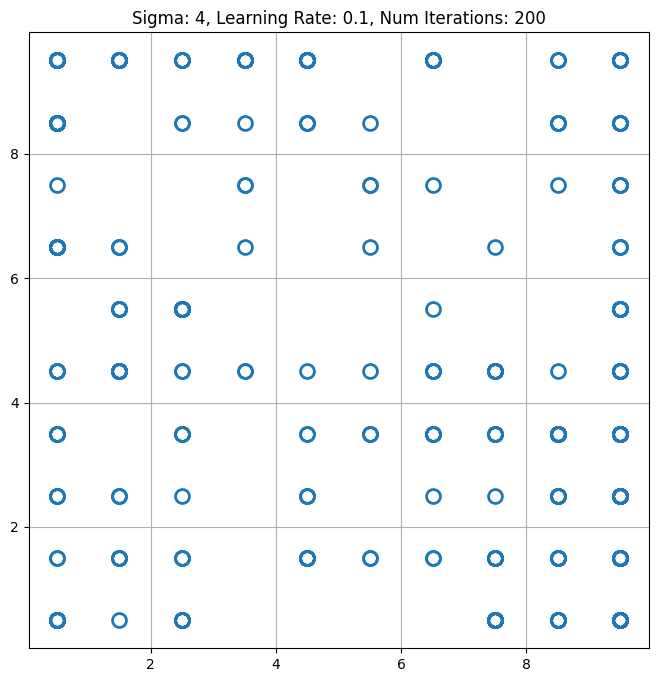

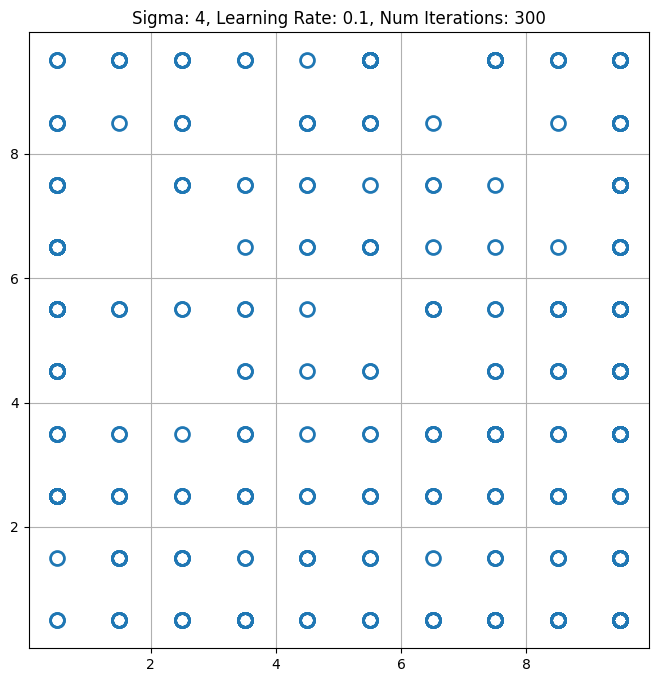

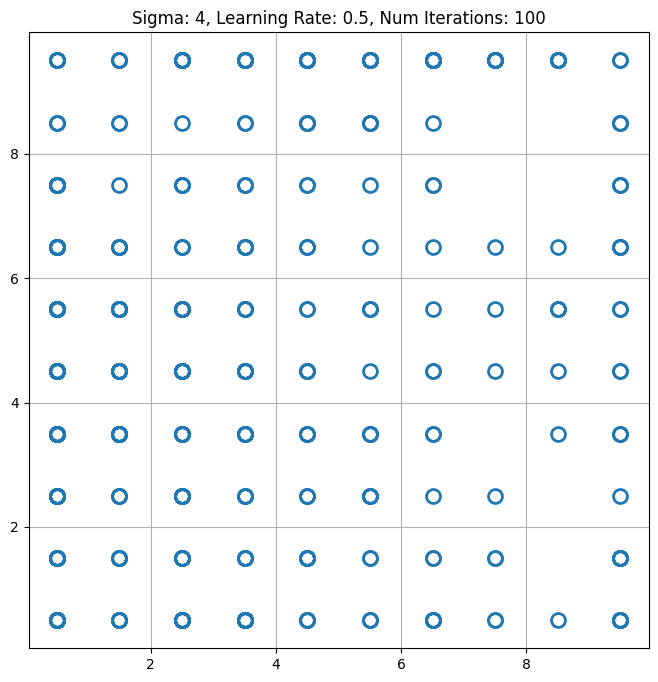

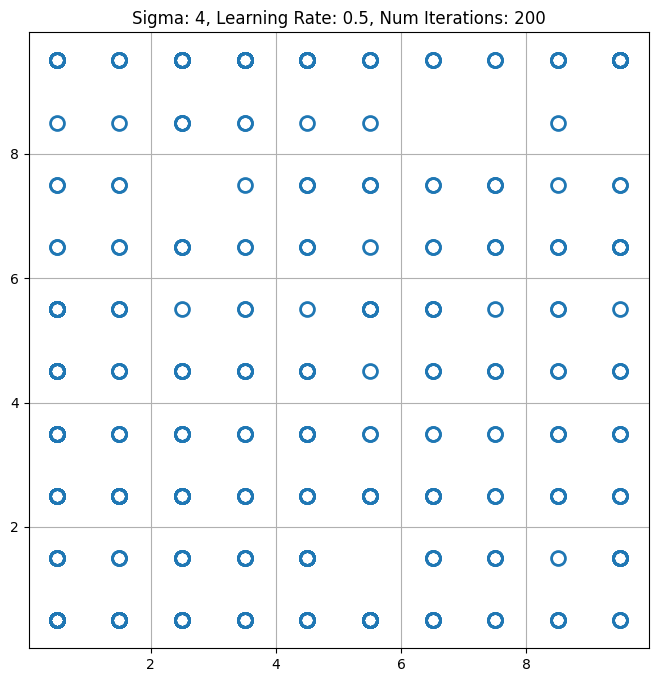

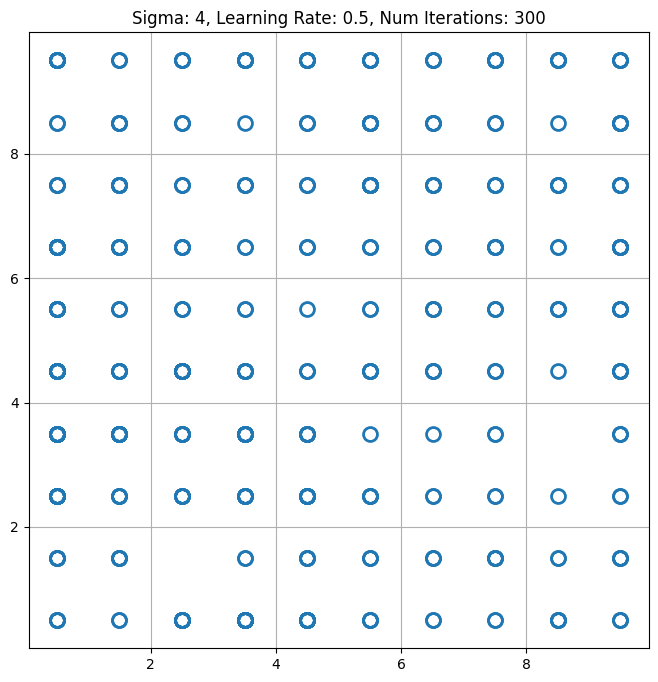

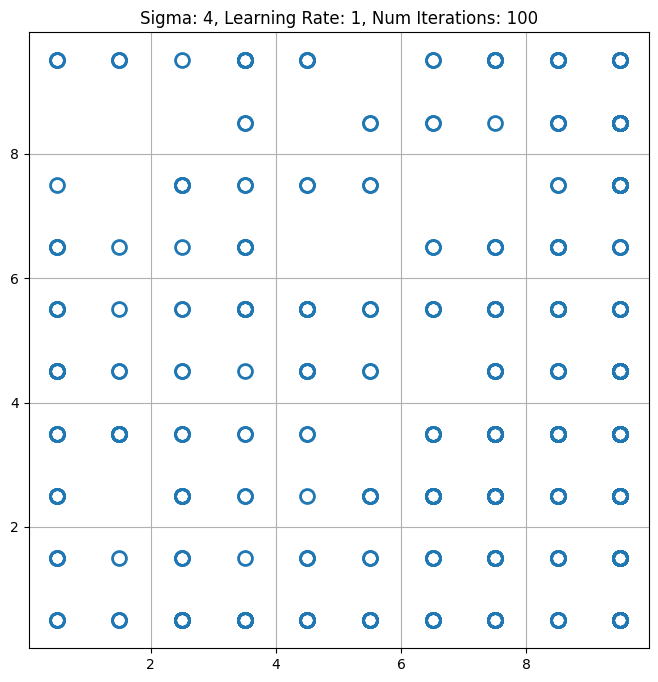

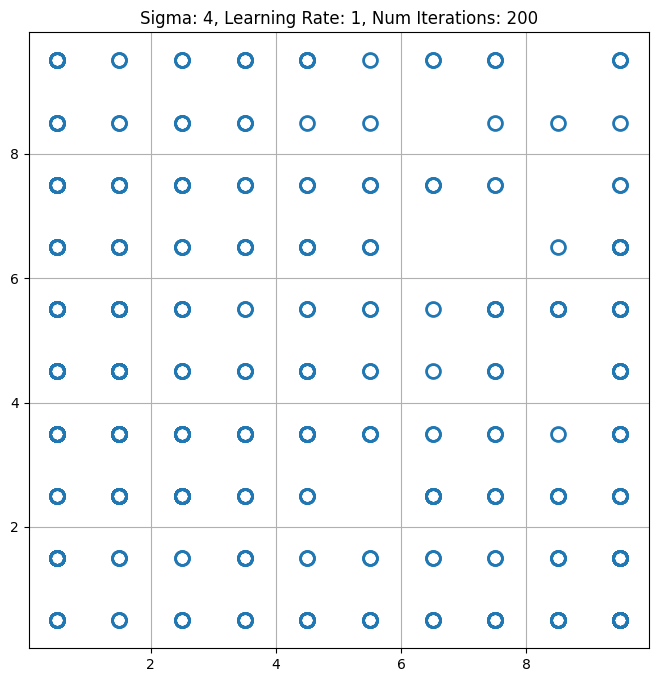

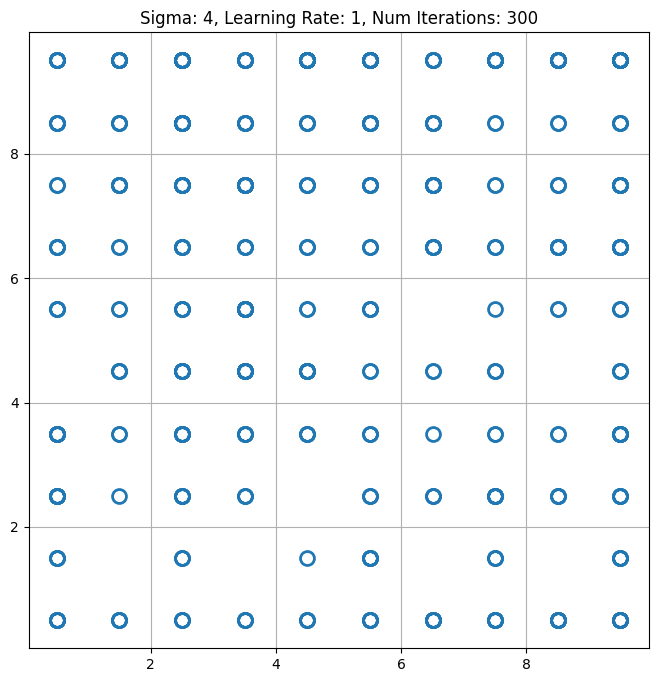

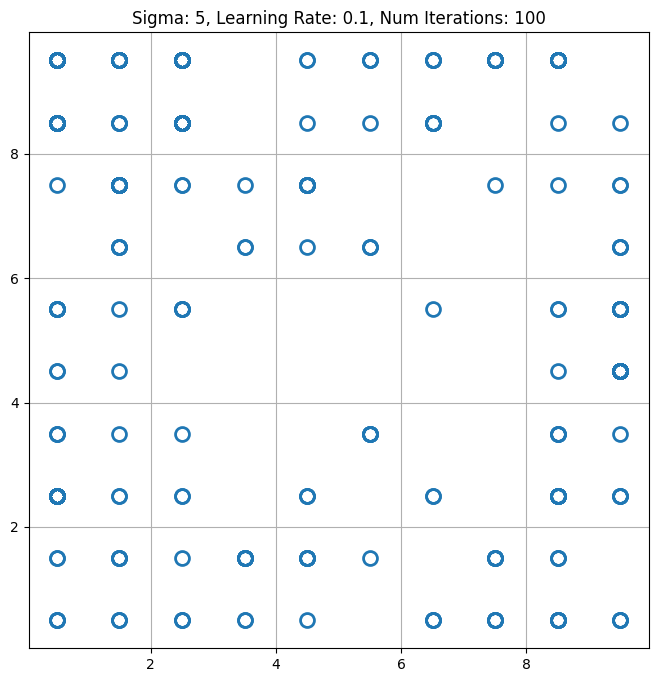

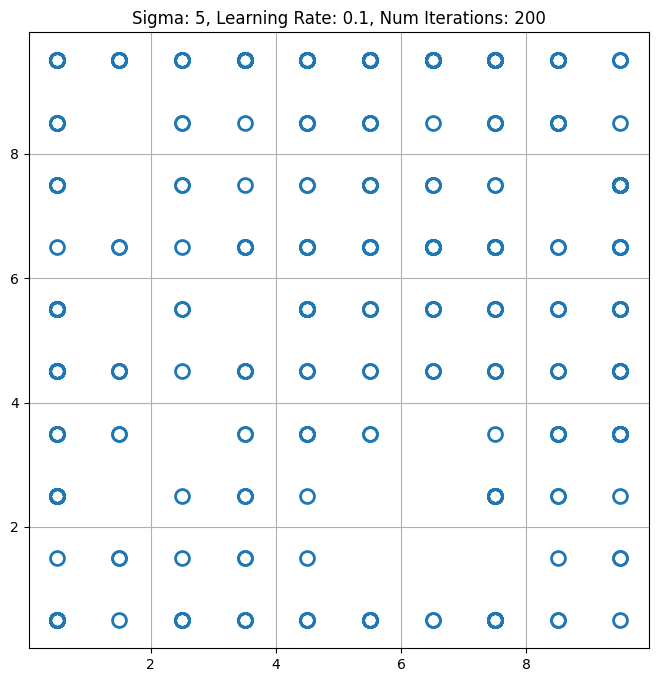

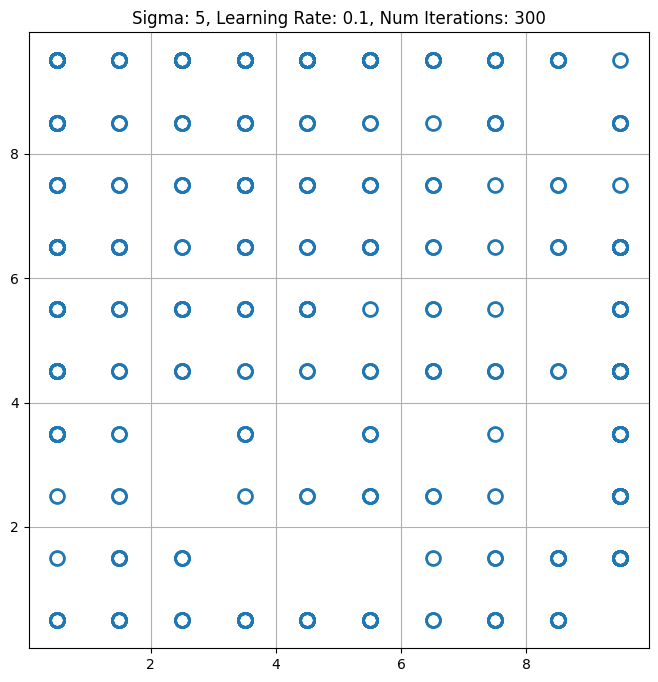

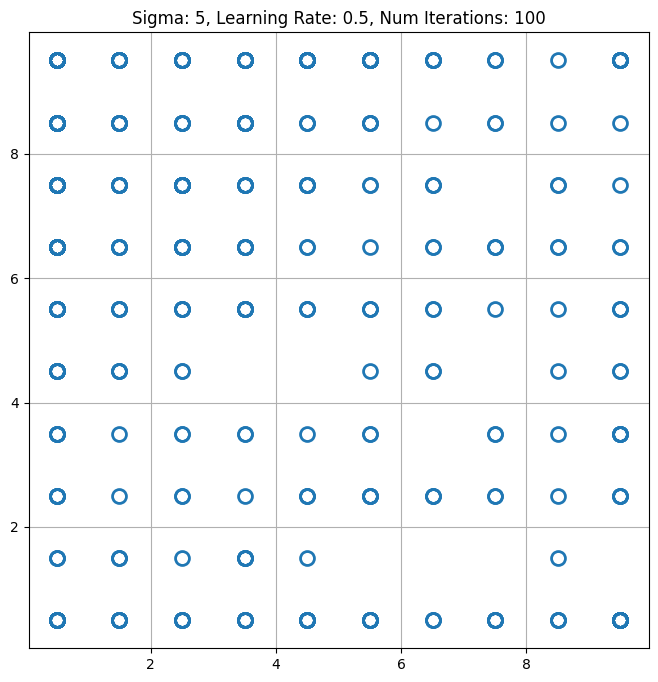

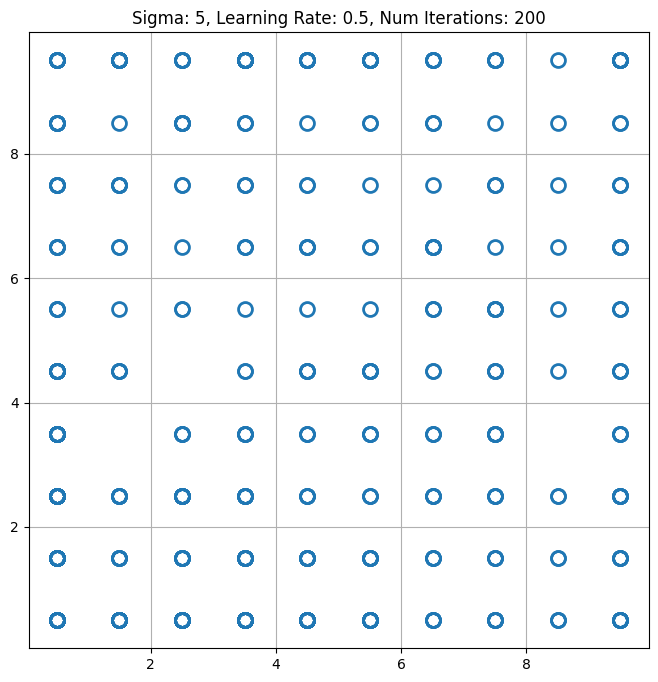

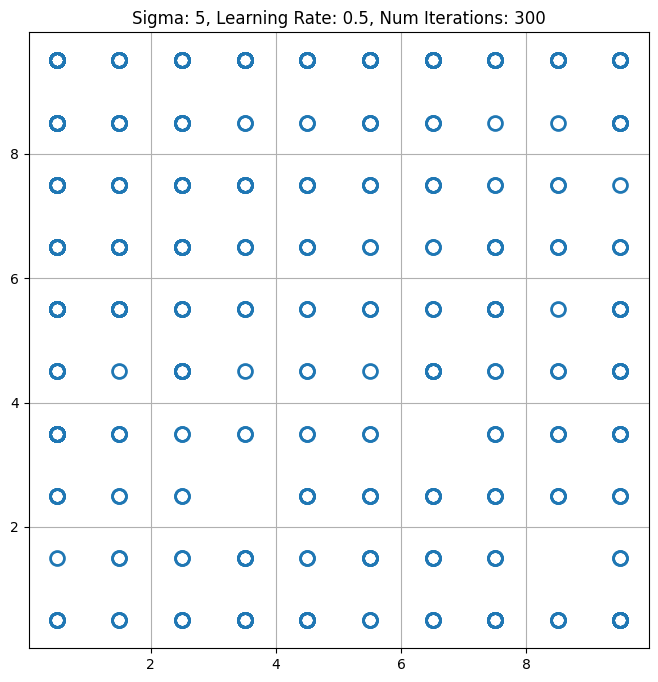

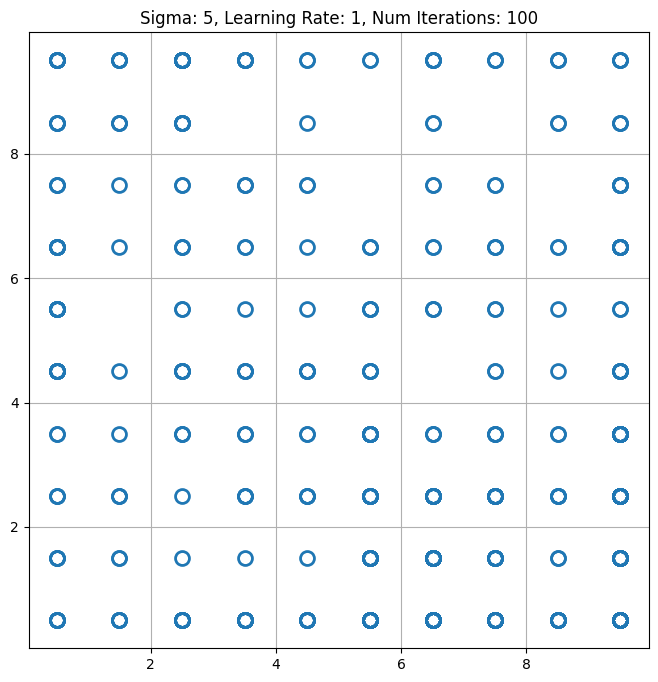

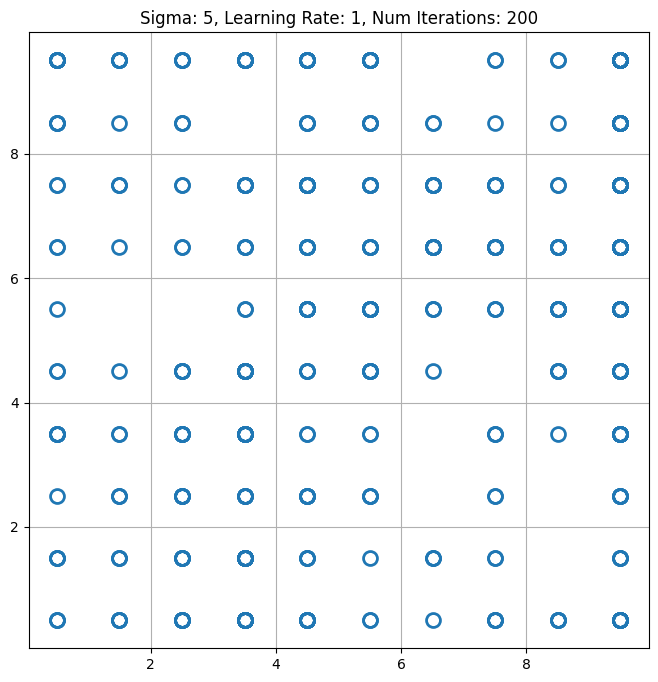

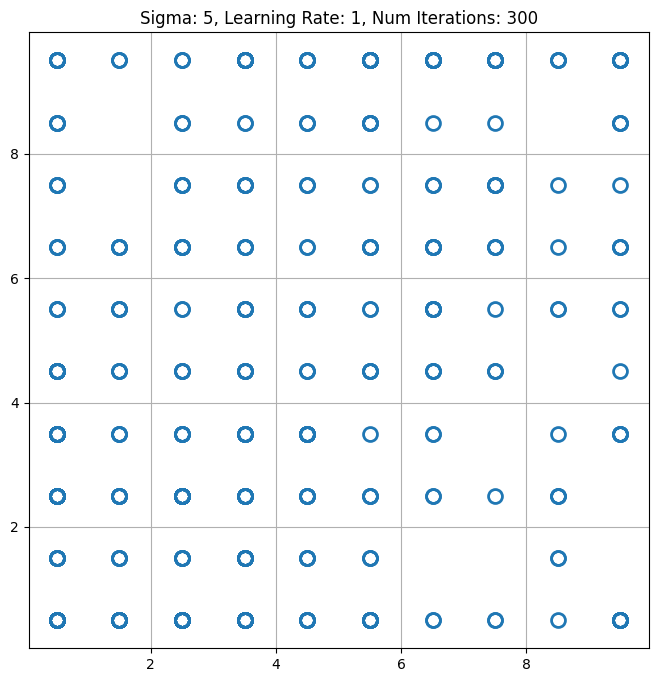

In [10]:
# Teste diferentes valores para sigma, learning_rate e num_iteration
sigma_values = [3, 4, 5]
learning_rates = [0.1, 0.5, 1]
num_iterations = [100, 200, 300]

# Itere sobre esses valores e treine o SOM
for sigma in sigma_values:
    for lr in learning_rates:
        for num_iter in num_iterations:
            som = MiniSom(x=10, y=10, input_len=X.shape[1], sigma=sigma, learning_rate=lr)
            som.random_weights_init(X)
            som.train_random(data=X, num_iteration=num_iter)

            # Visualize o mapa de ativação dos neurônios
            plt.figure(figsize=(8, 8))
            for i, x in enumerate(X):
                winning_neuron = som.winner(x)
                plt.plot(winning_neuron[0] + 0.5,
                         winning_neuron[1] + 0.5,
                         'o',
                         markerfacecolor='None',
                         markeredgecolor='C0',
                         markersize=10,
                         markeredgewidth=2)
            plt.title(f'Sigma: {sigma}, Learning Rate: {lr}, Num Iterations: {num_iter}')
            plt.grid(True)
            plt.show()


In [11]:
outliers = []
for i, x in enumerate(X):
    winning_neuron = som.winner(x)
    weights = som.weights[winning_neuron]
    distance = np.linalg.norm(x - weights)
    if distance > limiar:
        outliers.append(i)


AttributeError: 'MiniSom' object has no attribute 'weights'